# Image Captioning - Download COCO Dataset

*Last Updated: 01/28/2022*

This notebook will download the COCO dataset to the Google Drive. This notebook will only need to be run once.



**References**
 
1. Udacity's Computer Vision Nanodegree
2. https://github.com/cocodataset/cocoapi
3. https://colab.research.google.com/github/rammyram/image_captioning/blob/master/Image_Captioning.ipynb

**Prerequisite**

Please connect to your Google drive before running this notebook.

## Import Libraries

In [1]:
from pycocotools.coco import COCO
import os
import urllib
import zipfile

## Unzip Function

We will use the helper function `unzipping` to unzip .zip files to the paths we want.

In [12]:
## The unzipping function
def unzipping(zip_file_name, dest_dir):
    """
    Unzip the zip file to the destination path
    Args
        zip_file_name: (str) the file name of the zip file
        dest_dir: (str) the name of the destination folder
    """
    
    # check if the destination folder exists. Create one if not.
    if not os.path.exists(dest_dir):
        os.makedirs(dest_dir)
    
    # unzipping
    zip_f = zipfile.ZipFile(zip_file_name, 'r')
    zip_f.extractall(path=dest_dir)
    zip_f.close()

## Destination of Downloaded Data

I choose the path \content\drive\MyDrive\ImageCaptioning\opt to store COCOAPI.

In [2]:
# create COCOAPI folder
os.makedirs('/content/drive/MyDrive/ImageCaptioning/opt', exist_ok=True)

In [8]:
# move to opt
os.chdir('/content/drive/MyDrive/ImageCaptioning/opt')
!pwd

/content/drive/MyDrive/ImageCaptioning/opt


In [9]:
# clone COCOAPI repo
!git clone 'https://github.com/cocodataset/cocoapi.git'

Cloning into 'cocoapi'...
remote: Enumerating objects: 975, done.
remote: Total 975 (delta 0), reused 0 (delta 0), pack-reused 975
Receiving objects: 100% (975/975), 11.72 MiB | 5.23 MiB/s, done.
Resolving deltas: 100% (576/576), done.


In [10]:
# move to /cocoapi
os.chdir('/content/drive/MyDrive/ImageCaptioning/opt/cocoapi')
!pwd

/content/drive/MyDrive/ImageCaptioning/opt/cocoapi


## Download annotation data

In [13]:
# make sure we're in the cocoapi folder
!pwd

/content/drive/MyDrive/ImageCaptioning/opt/cocoapi


In [14]:
# download annotation data for training and validation dataset (ver: 2014)
urllib.request.urlretrieve(url='http://images.cocodataset.org/annotations/annotations_trainval2014.zip', filename='annotations_trainval2014.zip')

('annotations_trainval2014.zip', <http.client.HTTPMessage at 0x7f56089eb210>)

In [17]:
# unzip into the same folder (cocoapi)
unzipping('annotations_trainval2014.zip', '/content/drive/MyDrive/ImageCaptioning/opt/cocoapi')

A folder `annotations` will now be created in the `cocoapi` folder.

In [19]:
# remove the original zip file
os.remove('annotations_trainval2014.zip')

## Download testing image info

In [24]:
# make sure we're insode the cocoapi folder
!pwd

/content/drive/MyDrive/ImageCaptioning/opt/cocoapi


In [25]:
# download testing image info (ver: 2014)
urllib.request.urlretrieve(url='http://images.cocodataset.org/annotations/image_info_test2014.zip', filename='image_info_test2014.zip')

('image_info_test2014.zip', <http.client.HTTPMessage at 0x7f56085556d0>)

In [26]:
# unzip into the same folder (cocoapi)
unzipping('image_info_test2014.zip', '/content/drive/MyDrive/ImageCaptioning/opt/cocoapi')

In [27]:
# remove the original zip file
os.remove('image_info_test2014.zip')

## Download Images

We're now going to download all the images from the COCO Dataset. The size of the dataset will be around ~25GB in total.

Check your free space first!

In [20]:
# make sure we're in the cocoapi folder
!pwd

/content/drive/MyDrive/ImageCaptioning/opt/cocoapi


In [21]:
# download training, validation, and testing images
urllib.request.urlretrieve(url='http://images.cocodataset.org/zips/train2014.zip', filename='train2014.zip')
urllib.request.urlretrieve(url='http://images.cocodataset.org/zips/val2014.zip', filename='val2014.zip')
urllib.request.urlretrieve(url='http://images.cocodataset.org/zips/test2014.zip', filename='test2014.zip')

('test2014.zip', <http.client.HTTPMessage at 0x7f56090e5310>)

In [22]:
# unzip images
unzipping('train2014.zip', '/content/drive/MyDrive/ImageCaptioning/opt/cocoapi')
unzipping('val2014.zip', '/content/drive/MyDrive/ImageCaptioning/opt/cocoapi')
unzipping('test2014.zip', '/content/drive/MyDrive/ImageCaptioning/opt/cocoapi')

In [23]:
# remove zip files
os.remove('train2014.zip')
os.remove('val2014.zip')
os.remove('test2014.zip')

## Initialize COCO API

In [28]:
import sys
sys.path.append('/content/drive/MyDrive/ImageCaptioning/opt/cocoapi/PythonAPI')

In [31]:
# initialize instance annotation
instance_data_type = 'train'
instance_data_path = '/content/drive/MyDrive/ImageCaptioning/opt/cocoapi/annotations/instances_{}2014.json'.format(instance_data_type)
coco = COCO(instance_data_path)

loading annotations into memory...
Done (t=13.74s)
creating index...
index created!


In [33]:
# initialize caption annotations
caption_data_type = 'train'
caption_data_path = '/content/drive/MyDrive/ImageCaptioning/opt/cocoapi/annotations/captions_{}2014.json'.format(caption_data_type)
coco_caps = COCO(caption_data_path)

loading annotations into memory...
Done (t=1.34s)
creating index...
index created!


In [39]:
# get image ids
ids = list(coco.anns.keys())
print("Length of ids: {}".format(len(ids)))

Length of ids: 604907


In [40]:
ids[0]

86

## Plot a sample image

In [41]:
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt

%matplotlib inline

ann_id = 16692
img_id: 279530
http://images.cocodataset.org/train2014/COCO_train2014_000000279530.jpg


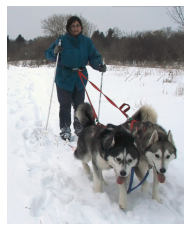

Cross country skier being assisted by two husky dogs
a woman stands in the snow on skis being pulled by two dogs
A woman on skis has reins attached to two husky dogs.
Picture of some animals and a person in the snow.
Woman on snow skis being pulled by dogs.


In [58]:
# random select an index
ann_id = np.random.choice(ids)
print("ann_id = {}".format(ann_id))

# image id
img_id = coco.anns[ann_id]['image_id']
print("img_id: {}".format(img_id))

# image
img = coco.loadImgs(img_id)[0]

# url
url = img['coco_url']
print(url)

# plot
plt.imshow(io.imread(url))
plt.axis('off')
plt.show()

# print all captions
annIds = coco_caps.getAnnIds(imgIds=img_id);
anns = coco_caps.loadAnns(annIds)
coco_caps.showAnns(anns)